In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [33]:
def plot_3_pops(self):
    fluxes_dict = self.parse_fluxes()
    #fluxes_dict = parse_fluxes(self)
    wavelengths = fluxes_dict['wavelengths'] #[24, 100, 160, 250, 350, 500, 850]
    wavelength_keys = list(self.results_dict['band_results_dict'].keys())
    split_dict = self.config_dict['catalog']['classification']
    # split_type = split_dict.pop('split_type')
    label_keys = list(split_dict.keys())
    label_dict = self.config_dict['parameter_names']
    ds = [len(label_dict[k]) for k in label_dict]

    fig, axs = plt.subplots(ds[-2], ds[0], figsize=(25, 7))
    
    #pdb.set_trace()
    ls = [ ':','-']
    pop = ['qt', 'sf']
    for z, zval in enumerate(self.config_dict['catalog']['distance_labels']):
        for k, kval in enumerate(label_dict[label_keys[3]]):
            for j, jval in enumerate(label_dict[label_keys[2]]):
                for i, ival in enumerate(label_dict[label_keys[1]]):
                    label = "__".join([zval, ival, jval, kval]).replace('.', 'p')
                    #print(label)

                    label = None
                    if not j and z == len(label_dict[label_keys[0]])-1:
                        label = "$M_{"+pop[k]+"}=$"+"-".join(ival.split('_')[-2:])

                    axs[j, z].plot(wavelengths, 1e3*fluxes_dict['flux'][:,z,i,j,k], ls=ls[k], label=label)

                    axs[j, z].set_ylim([5e-2, 5e1])
                    axs[j, z].set_xscale('log')
                    axs[j, z].set_yscale('log')
                    if z:
                        axs[j, z].set_yticklabels([])
                    if not j:
                        axs[j, z].set_title(zval)
                    if z == len(label_dict[label_keys[0]])-1:
                        ylabel = "Ah="+"-".join(jval.split('_')[-2:])
                        axs[j, z].set_ylabel(ylabel)
                        axs[j, z].yaxis.set_label_position("right")
                        
                    if not j and z == len(label_dict[label_keys[0]])-1:
                        axs[j, z].legend(bbox_to_anchor=(1.1,1), loc="upper left")
                    #pdb.set_trace()


In [709]:
def plot_pops(self):
    fluxes_dict = self.parse_fluxes()
    #fluxes_dict = parse_fluxes(self)
    wavelengths = fluxes_dict['wavelengths'] #[24, 100, 160, 250, 350, 500, 850]
    wavelength_keys = list(self.results_dict['band_results_dict'].keys())
    split_dict = self.config_dict['catalog']['classification']
    # split_type = split_dict.pop('split_type')
    label_keys = list(split_dict.keys())
    label_dict = self.config_dict['parameter_names']
    ds = [len(label_dict[k]) for k in label_dict]

    fig, axs = plt.subplots(ds[-2], ds[0], figsize=(25,9))
    
    #pdb.set_trace()
    ls = [ ':','-']
    pop = ['qt', 'sf']
    color = ['r', 'b', 'g', 'k']
    for z, zval in enumerate(self.config_dict['catalog']['distance_labels']):
        if len(label_keys) == 5:
            for l, lval in enumerate(label_dict[label_keys[4]]):
                for iagn, agn_val in enumerate(label_dict[label_keys[3]]):
                    for isb, sb_val in enumerate(label_dict[label_keys[2]]):
                        for imass, m_val in enumerate(label_dict[label_keys[1]]):
                            label = "__".join([zval, m_val, sb_val, agn_val, lval]).replace('.', 'p')
                            #print(label)

                            label = None
                            if l and not iagn and z == len(label_dict[label_keys[0]])-1:
                                label = "$M_{"+pop[l]+"}=$"+"-".join(m_val.split('_')[-2:])+", F24="+"-".join(sb_val.split('_')[-2:])

                            if l:
                                axs[iagn, z].plot(wavelengths, 1e3*fluxes_dict['flux'][:,z,imass,isb,iagn,l], ls=ls[l], color=color[isb], label=label)

                            axs[iagn, z].set_ylim([5e-2, 5e1])
                            axs[iagn, z].set_xscale('log')
                            axs[iagn, z].set_yscale('log')
                            if z:
                                axs[iagn, z].set_yticklabels([])
                            if not iagn:
                                axs[iagn, z].set_title(zval)
                            if z == len(label_dict[label_keys[0]])-1:
                                ylabel = "Ah="+"-".join(agn_val.split('_')[-2:])
                                axs[iagn, z].set_ylabel(ylabel)
                                axs[iagn, z].yaxis.set_label_position("right")

                            if l and not iagn and z == len(label_dict[label_keys[0]])-1:
                                axs[iagn, z].legend(bbox_to_anchor=(1.1,1), loc="upper left")
                            #pdb.set_trace()
        else:
            for l, lval in enumerate(label_dict[label_keys[3]]):
                for iagn, agn_val in enumerate(label_dict[label_keys[2]]):
                    for imass, m_val in enumerate(label_dict[label_keys[1]]):
                        label = "__".join([zval, m_val, agn_val, lval]).replace('.', 'p')
                        #print(label)

                        label = None
                        if l and not iagn and z == len(label_dict[label_keys[0]])-1:
                            label = "$M_{"+pop[l]+"}=$"+"-".join(m_val.split('_')[-2:])

                        if l:
                            axs[iagn, z].plot(wavelengths, 1e3*fluxes_dict['flux'][:,z,imass,iagn,l], ls=ls[l], label=label)

                        axs[iagn, z].set_ylim([5e-2, 5e1])
                        axs[iagn, z].set_xscale('log')
                        axs[iagn, z].set_yscale('log')
                        if z:
                            axs[iagn, z].set_yticklabels([])
                        if not iagn:
                            axs[iagn, z].set_title(zval)
                        if z == len(label_dict[label_keys[0]])-1:
                            ylabel = "Ah="+"-".join(agn_val.split('_')[-2:])
                            axs[iagn, z].set_ylabel(ylabel)
                            axs[iagn, z].yaxis.set_label_position("right")

                        if l and not iagn and z == len(label_dict[label_keys[0]])-1:
                            axs[iagn, z].legend(bbox_to_anchor=(1.1,1), loc="upper left")
                        #pdb.set_trace()


In [96]:
def plot_4_pops(self):
    fluxes_dict = self.parse_fluxes()
    #fluxes_dict = parse_fluxes(self)
    wavelengths = fluxes_dict['wavelengths'] #[24, 100, 160, 250, 350, 500, 850]
    wavelength_keys = list(self.results_dict['band_results_dict'].keys())
    split_dict = self.config_dict['catalog']['classification']
    # split_type = split_dict.pop('split_type')
    label_keys = list(split_dict.keys())
    label_dict = self.config_dict['parameter_names']
    ds = [len(label_dict[k]) for k in label_dict]

    fig, axs = plt.subplots(ds[-2], ds[0], figsize=(25, 7))
    
    #pdb.set_trace()
    ls = [ ':','-']
    pop = ['qt', 'sf']
    color = ['r', 'b', 'g', 'k']
    for z, zval in enumerate(self.config_dict['catalog']['distance_labels']):
        for l, lval in enumerate(label_dict[label_keys[4]]):
            for iagn, agn_val in enumerate(label_dict[label_keys[3]]):
                for isb, sb_val in enumerate(label_dict[label_keys[2]]):
                    for imass, m_val in enumerate(label_dict[label_keys[1]]):
                        label = "__".join([zval, m_val, sb_val, agn_val, lval]).replace('.', 'p')
                        #print(label)

                        label = None
                        if l and not iagn and z == len(label_dict[label_keys[0]])-1:
                            label = "$M_{"+pop[l]+"}=$"+"-".join(m_val.split('_')[-2:])+", F24="+"-".join(sb_val.split('_')[-2:])

                        if l:
                            axs[iagn, z].plot(wavelengths, 1e3*fluxes_dict['flux'][:,z,imass,isb,iagn,l], ls=ls[l], color=color[isb], label=label)

                        axs[iagn, z].set_ylim([5e-2, 5e1])
                        axs[iagn, z].set_xscale('log')
                        axs[iagn, z].set_yscale('log')
                        if z:
                            axs[iagn, z].set_yticklabels([])
                        if not iagn:
                            axs[iagn, z].set_title(zval)
                        if z == len(label_dict[label_keys[0]])-1:
                            ylabel = "Ah="+"-".join(agn_val.split('_')[-2:])
                            axs[iagn, z].set_ylabel(ylabel)
                            axs[iagn, z].yaxis.set_label_position("right")

                        if l and not iagn and z == len(label_dict[label_keys[0]])-1:
                            axs[iagn, z].legend(bbox_to_anchor=(1.1,1), loc="upper left")
                        #pdb.set_trace()


In [92]:
def parse_fluxes(self):

    wavelength_keys = list(self.results_dict['band_results_dict'].keys())
    wavelengths = []
    split_dict = self.config_dict['catalog']['classification']
    # split_type = split_dict.pop('split_type')
    label_keys = list(split_dict.keys())
    label_dict = self.config_dict['parameter_names']
    ds = [len(label_dict[k]) for k in label_dict]

    sed_flux_array = np.zeros([len(wavelength_keys), *ds])
    sed_error_array = np.zeros([len(wavelength_keys), *ds])

    for ik, key in enumerate(wavelength_keys):
        self.results_dict['band_results_dict'][key]['raw_fluxes_dict'] = {}

        wavelengths.append(self.config_dict['maps'][key]['wavelength'])

        len_results_dict_keys = np.sum(['flux_densities' in i for i in self.results_dict['band_results_dict'][key].keys()])
        flux_array = np.zeros([len_results_dict_keys, *ds])
        outlier_array = np.zeros([len_results_dict_keys, *ds])
        error_array = np.zeros(ds)

        #pdb.set_trace()
        for iboot in np.arange(len_results_dict_keys):
            if not iboot:
                boot_label = 'stacked_flux_densities'
            else:
                boot_label = 'bootstrap_flux_densities_' + str(int(iboot))

            results_object = self.results_dict['band_results_dict'][key][boot_label]

            for z, zval in enumerate(self.config_dict['catalog']['distance_labels']):
                for i, ival in enumerate(label_dict[label_keys[1]]):
                    if len(label_keys) > 2:
                        for j, jval in enumerate(label_dict[label_keys[2]]):
                            if len(label_keys) > 3:
                                for k, kval in enumerate(label_dict[label_keys[3]]):
                                    if len(label_keys) > 4:
                                        for l, lval in enumerate(label_dict[label_keys[4]]):
                                            label = "__".join([zval, ival, jval, kval, lval]).replace('.', 'p')
                                            # CHECK THAT LABEL EXISTS FIRST
                                            if label in results_object:
                                                if label+'__bootstrap2' in results_object:
                                                    outlier_array[iboot, z, i, j, k, l] = results_object[label].value
                                                    flux_array[iboot, z, i, j, k, l] = results_object[label + '__bootstrap2'].value
                                                else:
                                                    flux_array[iboot, z, i, j, k, l] = results_object[label].value
                                                    #print("{0} = {1:0.2e}".format(label, results_object[label].value))

                                                if len_results_dict_keys == 1:
                                                    error_array[z, i, j, k, l] = results_object[label].stderr
                                                    
                                    label = "__".join([zval, ival, jval, kval]).replace('.', 'p')
                                    # CHECK THAT LABEL EXISTS FIRST
                                    if label in results_object:
                                        if label+'__bootstrap2' in results_object:
                                            outlier_array[iboot, z, i, j, k] = results_object[label].value
                                            flux_array[iboot, z, i, j, k] = results_object[label + '__bootstrap2'].value
                                        else:
                                            flux_array[iboot, z, i, j, k] = results_object[label].value
                                            #print("{0} = {1:0.2e}".format(label, results_object[label].value))

                                        if len_results_dict_keys == 1:
                                            error_array[z, i, j, k] = results_object[label].stderr
                            else:
                                label = "__".join([zval, ival, jval]).replace('.', 'p')
                                # CHECK THAT LABEL EXISTS FIRST
                                if label in results_object:
                                    if label+'__bootstrap2' in results_object:
                                        outlier_array[iboot, z, i, j] = results_object[label].value
                                        flux_array[iboot, z, i, j] = results_object[label + '__bootstrap2'].value
                                    else:
                                        flux_array[iboot, z, i, j] = results_object[label].value

                                    if len_results_dict_keys == 1:
                                        error_array[z, i, j] = results_object[label].stderr
                    else:
                        label = "__".join([zval, ival]).replace('.', 'p')
                        if label in results_object:
                            if label + '__bootstrap2' in results_object:
                                outlier_array[iboot, z, i] = results_object[label].value
                                flux_array[iboot, z, i] = results_object[label+'__bootstrap2'].value
                            else:
                                flux_array[iboot, z, i] = results_object[label].value

                            if len_results_dict_keys == 1:
                                error_array[z, i] = results_object[label].stderr

        #pdb.set_trace()
        sed_flux_array[ik] = flux_array[0]
        sed_error_array[ik] = np.std(flux_array, axis=0)

    return {'flux': sed_flux_array, 'error': sed_error_array, 'wavelengths': wavelengths}

In [810]:
# Import catalog with SimstackWrapper
combined_pickle_filename = "uVista_DR2_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4p0_X_4_foregnd_atonce_"
combined_pickle_filename = "uVista_DR2_Ahat_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_X_4_foregnd_atonce_"
#combined_pickle_filename = "uVista_DR2_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_X_4_foregnd_atonce_"
combined_pickle_filename = "uVista_DR2_Ahat_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_X_4_foregnd_layers_" # Ahat and starburst
combined_pickle_filename = "uVista_DR2_Ahat_Starburst_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5p0_X_4_foregnd_layers_"
combined_pickle_filename = "uVista_DR2_Ahat_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4p0_X_4_foregnd_layers_"
#combined_pickle_filename = "uVista_DR2_SB_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4p0_X_4_foregnd_layers_"
combined_pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities", combined_pickle_filename)
underscore_suffix = "" # "__"
path_ini_file = os.path.join(combined_pickle_path+underscore_suffix, "uvista.ini")
path_pickle_file = os.path.join(combined_pickle_path+underscore_suffix, combined_pickle_filename+".pkl")
if os.path.isfile(path_ini_file):
    simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
else:
    print(path_ini_file+' not found')

In [811]:
simstack_maps_object = SimstackWrapper(path_ini_file, save_automatically=False, read_maps=True, read_catalog=False)

In [812]:
# Import saved stacking results
simstack_object = SimstackToolbox.import_saved_pickles(path_pickle_file)

In [813]:
# Inspect object keys
simstack_object.results_dict['band_results_dict'].keys()

dict_keys(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850'])

In [814]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [815]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [816]:
fluxes_dict = parse_fluxes(simstack_object)

In [817]:
np.shape(fluxes_dict['flux'])

(7, 8, 4, 5, 2)

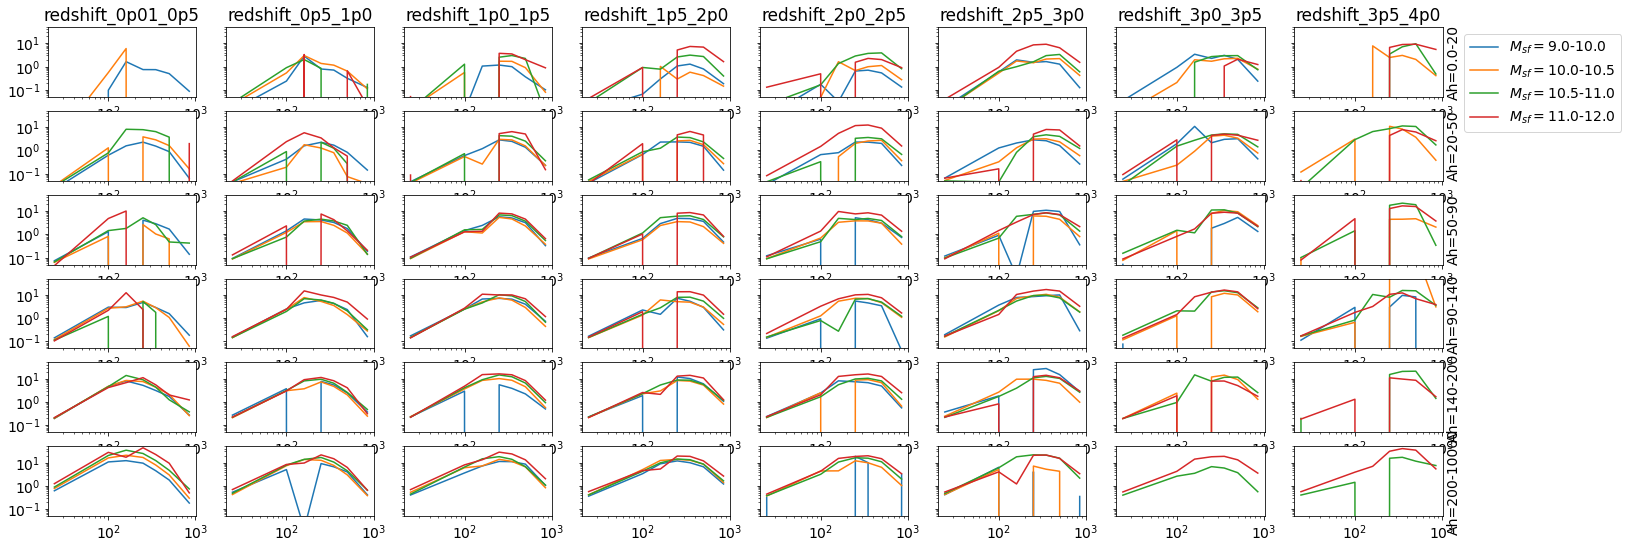

In [749]:
plot_pops(simstack_object)

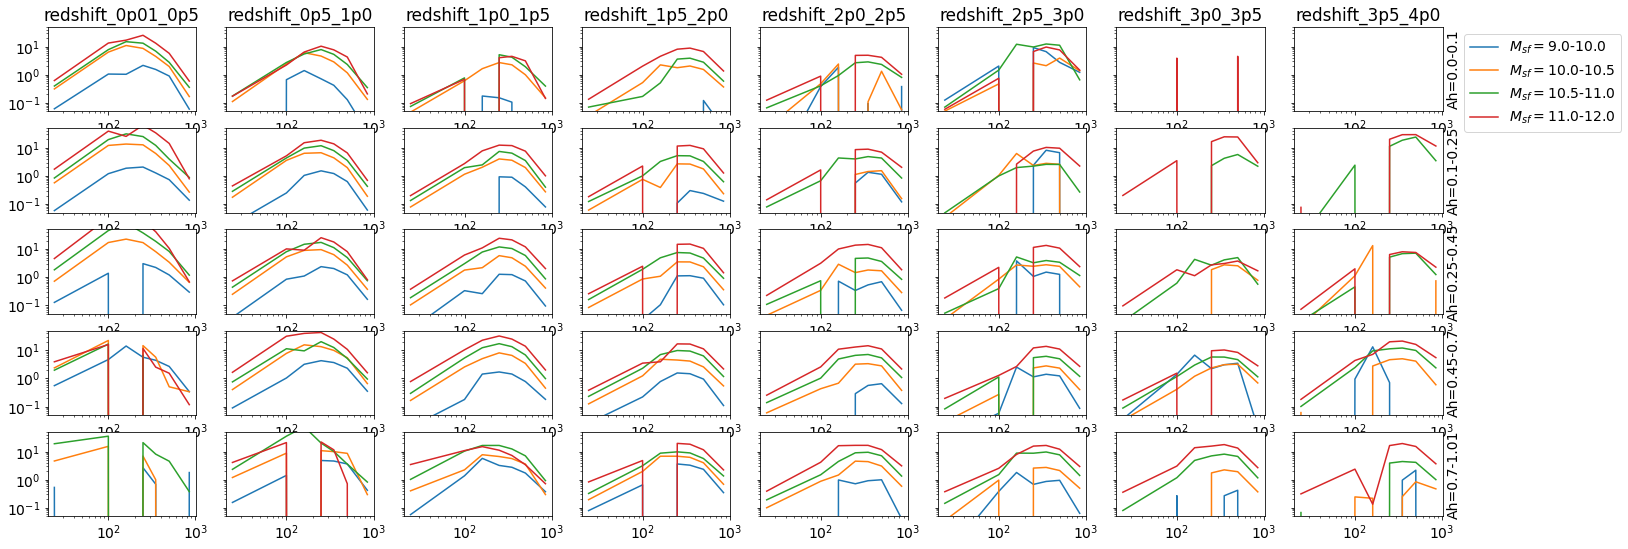

In [710]:
plot_pops(simstack_object)

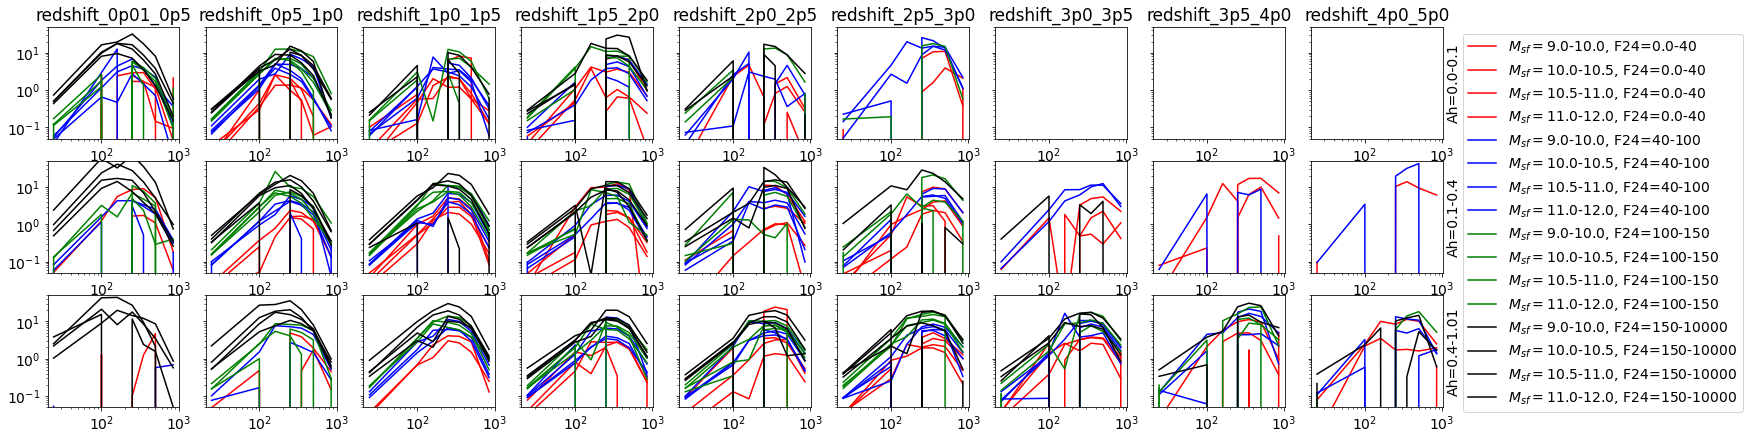

In [368]:
plot_4_pops(simstack_object)

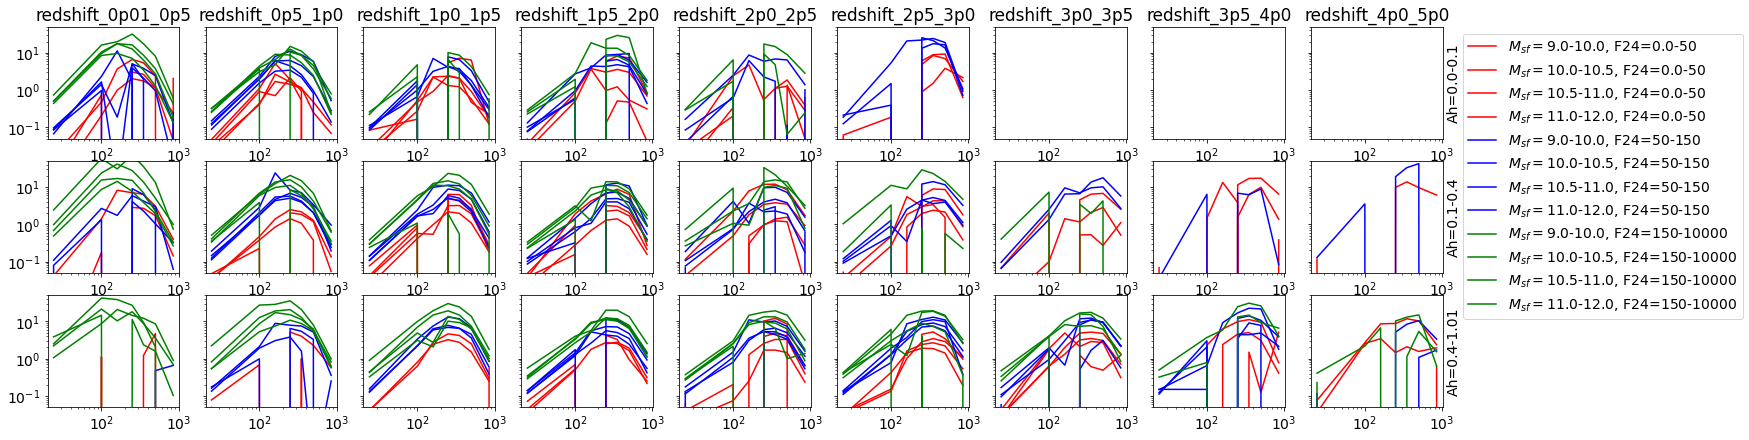

In [97]:
plot_4_pops(simstack_object)

In [369]:
idx_bin = (simstack_object.catalog_dict['tables']['split_table']['redshift'] == 0) & \
          (simstack_object.catalog_dict['tables']['split_table']['stellar_mass'] == 0) & \
          (simstack_object.catalog_dict['tables']['split_table']['agn_fraction'] == 0) & \
          (simstack_object.catalog_dict['tables']['split_table']['starburst'] == 0) & \
          (simstack_object.catalog_dict['tables']['split_table']['split_params'] == 1)  
np.median(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin]['z_peak'])

0.39904

In [800]:
def get_fast_sed_dict(self, fluxes_dict, catalog_object):
    
    split_dict = self.config_dict['catalog']['classification']
    label_keys = list(split_dict.keys())
    catalog_keys = [split_dict[i]['id'] for i in label_keys]
    label_dict = self.config_dict['parameter_names']
    
    x = fluxes_dict['wavelengths']

    wv_array = self.loggen(8, 1000, 100)
    sed_params_dict = {}
    graybody_dict = {}
    lir_dict = {}
    return_dict = {'wv_array': wv_array,
                   'sed_params': sed_params_dict, 
                   'graybody': graybody_dict, 
                   'lir': lir_dict}
    
    for ilabel in label_keys:
        return_dict[ilabel] = {}
        
    for z, z_val in enumerate(label_dict[label_keys[0]]):
        for m, m_val in enumerate(label_dict[label_keys[1]]):
            for j, j_val in enumerate(label_dict[label_keys[2]]):
                for k, k_val in enumerate(label_dict[label_keys[3]]):
                    if len(label_keys) > 4:
                        for l, l_val in enumerate(label_dict[label_keys[4]]):

                            label = "__".join([z_val, m_val, j_val, k_val, l_val]).replace('.', 'p')

                            idx_bin = (self.catalog_dict['tables']['split_table'][label_keys[0]] == z) & \
                                      (self.catalog_dict['tables']['split_table'][label_keys[1]] == m) & \
                                      (self.catalog_dict['tables']['split_table'][label_keys[2]] == j) & \
                                      (self.catalog_dict['tables']['split_table'][label_keys[3]] == k) & \
                                      (self.catalog_dict['tables']['split_table'][label_keys[4]] == l)  

                            for ilab, lab in enumerate(label_keys):
                                return_dict[lab][label]=np.median(catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin][catalog_keys[ilab]].dropna())

                            y = fluxes_dict['flux'][:,z,m,j,k,l]
                            yerr = np.sqrt(abs(fluxes_dict['flux'][:,z,m,j,k,l]))

                            sed_params_dict[label] = self.fast_sed_fitter(x, y, yerr)
                            graybody_dict[label] = self.fast_sed(sed_params_dict[label], wv_array)[0]
                            theta = sed_params_dict[label]['A'].value, sed_params_dict[label]['T_observed'].value
                            lir_dict[label] = self.fast_LIR(theta, return_dict[label_keys[0]][label])
                    else:
                        label = "__".join([z_val, m_val, j_val, k_val]).replace('.', 'p')
                        idx_bin = (self.catalog_dict['tables']['split_table'][label_keys[0]] == z) & \
                                  (self.catalog_dict['tables']['split_table'][label_keys[1]] == m) & \
                                  (self.catalog_dict['tables']['split_table'][label_keys[2]] == j) & \
                                  (self.catalog_dict['tables']['split_table'][label_keys[3]] == k) 
                        for ilab, lab in enumerate(label_keys):
                            return_dict[lab][label]=np.median(catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin][catalog_keys[ilab]].dropna())
                        
                        y = fluxes_dict['flux'][:,z,m,j,k]
                        yerr = np.sqrt(abs(fluxes_dict['flux'][:,z,m,j,k]))

                        sed_params_dict[label] = self.fast_sed_fitter(x, y, yerr)
                        graybody_dict[label] = self.fast_sed(sed_params_dict[label], wv_array)[0]
                        theta = sed_params_dict[label]['A'].value, sed_params_dict[label]['T_observed'].value
                        lir_dict[label] = self.fast_LIR(theta, return_dict[label_keys[0]][label])

    return return_dict

In [411]:
def black(nu_in, T):
    #h = 6.623e-34     ; Joule*s
    #k = 1.38e-23      ; Joule/K
    #c = 3e8           ; m/s
    # (2*h*nu_in^3/c^2)*(1/( exp(h*nu_in/k*T) - 1 )) * 10^29

    a0 = 1.4718e-21   # 2*h*10^29/c^2
    a1 = 4.7993e-11   # h/k

    num = a0 * nu_in**3.0
    den = np.exp(a1 * np.outer(1.0/T,nu_in)) - 1.0
    ret = num / den

    return ret

In [555]:
def get_flux_mJy(nu_in, Ain, T, betain=1.8, alphain=2.0):
    
    A = 10**Ain
    ng = np.size(A)

    ns = len(nu_in)
    base = 2.0 * (6.626)**(-2.0 - betain - alphain) * (1.38)**(3. + betain + alphain) / (2.99792458)**2.0
    expo = 34.0 * (2.0 + betain + alphain) - 23.0 * (3.0 + betain + alphain) - 16.0 + 26.0
    K = base * 10.0**expo
    w_num = A * K * (T * (3.0 + betain + alphain))**(3.0 + betain + alphain)
    w_den = (np.exp(3.0 + betain + alphain) - 1.0)
    w_div = w_num/w_den
    nu_cut = (3.0 + betain + alphain) * 0.208367e11 * T

    graybody = A * nu_in**betain * black(nu_in, T)[:,0] / 1000. 
    powerlaw = w_div * nu_in**(-1.0 * alphain)
    ind_cut = nu_in > nu_cut
    #pdb.set_trace()
    if np.sum(ind_cut):
        graybody[ind_cut] = powerlaw[ind_cut]
    
    #pdb.set_trace()
    return graybody

In [673]:
c = 299792458.0 # m/s
lambda_mod = spire_250['wavelength']
nu_mod = c * 1.e6/lambda_mod

A_model = model_A_Tdust(cov_Adust.params, model_cube)
T_model = model_A_Tdust(cov_Tdust.params, model_cube)

S_250 = get_flux_mJy(np.array([nu_mod]),A_model,T_model)

In [674]:
A_model

array([-37.75782483, -37.15478953, -37.45345599, ..., -41.56665798,
       -42.72156052, -45.08421506])

In [575]:
from astropy.wcs import WCS
def get_x_y_from_ra_dec(self, ra_series, dec_series):

    smap = self['map']
    hd = self['header']
    wmap= WCS(hd)
    cms = np.shape(smap)
    
    ra = ra_series.values #[ind_src].values
    dec = dec_series.values #[ind_src].values
    # CONVERT FROM RA/DEC to X/Y
    #pdb.set_trace()
    ty, tx = wmap.wcs_world2pix(ra, dec, 0)
    # CHECK FOR SOURCES THAT FALL OUTSIDE MAP
    ind_keep = np.where((tx >= 0) & (np.round(tx) < cms[0]) & (ty >= 0) & (np.round(ty) < cms[1]))
    real_x = np.round(tx[ind_keep]).astype(int)
    real_y = np.round(ty[ind_keep]).astype(int)

    return real_x, real_y, ind_keep[0]

In [576]:
spire_250 = simstack_maps_object.maps_dict['spire_psw']

In [577]:
x, y, idx_model = get_x_y_from_ra_dec(spire_250,simstack_catalog_object.catalog_dict['tables']['full_table']['ra'],simstack_catalog_object.catalog_dict['tables']['full_table']['dec'])

In [578]:
np.shape(S_250)

(166633,)

In [613]:
model_250 = np.zeros_like(spire_250['map'])

In [729]:
model_250[x,y]=S_250#[idx_model]# - np.mean(S_250[idx_model])
#model_250[model_250 == model_250] = model_250[model_250 == model_250] - np.mean(model_250[model_250 == model_250])
model_250[model_250 != model_250] = 0

In [730]:
from scipy.ndimage.filters import gaussian_filter

def gauss_kern(fwhm, side, pixsize):
    ''' Create a 2D Gaussian (size= side x side)'''

    sig = fwhm / 2.355 / pixsize
    delt = np.zeros([int(side), int(side)])
    delt[0, 0] = 1.0
    ms = np.shape(delt)
    #delt = self.shift_twod(delt, ms[0] / 2, ms[1] / 2)
    delt = np.roll(np.roll(delt, int(ms[0] / 2), axis=1), int(ms[1] / 2), axis=0)
    kern = delt
    gaussian_filter(delt, sig, output=kern)
    kern /= np.max(kern)

    return kern

def smooth_psf(mapin, psfin):

    s = np.shape(mapin)
    mnx = s[0]
    mny = s[1]

    s = np.shape(psfin)
    pnx = s[0]
    pny = s[1]

    psf_x0 = pnx / 2
    psf_y0 = pny / 2
    psf = psfin
    px0 = psf_x0
    py0 = psf_y0

    # pad psf
    psfpad = np.zeros([mnx, mny])
    psfpad[0:pnx, 0:pny] = psf

    # shift psf so that centre is at (0,0)
    #psfpad = self.shift_twod(psfpad, -px0, -py0)
    psfpad = np.roll(np.roll(psfpad, int(-px0), axis=1), int(-py0), axis=0)
    smmap = np.real(np.fft.ifft2(np.fft.fft2(mapin) *
                                 np.fft.fft2(psfpad))
                    )

    return smmap

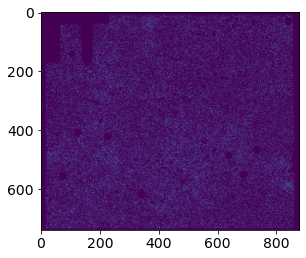

In [731]:
from astropy.io import fits
plt.imshow(model_250)

map_name = 'spire_psw'
map_object = simstack_maps_object.maps_dict[map_name]
path_layer = r'D:\maps\cutouts\layers'
path_layer = r'C:\Users\viero\Desktop'
name_layer = 'model_'+str(map_name)+'.fits'

hd = map_object['header']
fwhm = map_object['fwhm']
pix = map_object['pixel_size']
kern = gauss_kern(fwhm, np.floor(fwhm * 10) / pix, pix)
tmap = smooth_psf(model_250, kern)

hdu = fits.PrimaryHDU(tmap, header=hd)
hdul = fits.HDUList([hdu])
hdul.writeto(os.path.join(path_layer, name_layer),overwrite=True)

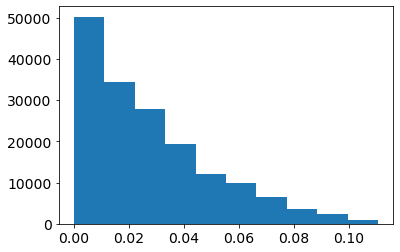

In [582]:
plt.hist(1e3*S_250[S_250 > 1e-10]);

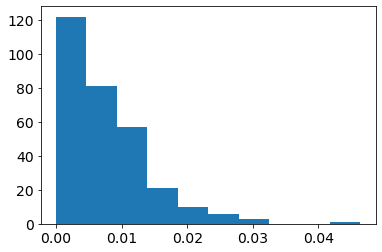

In [465]:
plt.hist(S_250[S_250 > 1e-10]);

In [728]:
for key, val in simstack_object.config_dict['catalog']['classification'].items():
    print(key)
    print(val['id'])

redshift
z_peak
stellar_mass
LMASS
agn_fraction
a_hat_AGN
split_params
sfg


In [739]:
split_dict = simstack_object.config_dict['catalog']['classification']
print(split_dict)
label_keys = list(split_dict.keys())
catalog_keys = [split_dict[i]['id'] for i in label_keys]
print(label_keys)
print(catalog_keys)

{'redshift': {'id': 'z_peak', 'bins': '[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]'}, 'stellar_mass': {'id': 'LMASS', 'bins': '[9.0, 10.0, 10.5, 11.0, 12.0]'}, 'agn_fraction': {'id': 'a_hat_AGN', 'bins': '[0.0, 0.1, 0.25, 0.45, 0.7, 1.01]'}, 'split_params': {'id': 'sfg', 'bins': {'U-V': 'rf_U_V', 'V-J': 'rf_V_J'}}}
['redshift', 'stellar_mass', 'agn_fraction', 'split_params']
['z_peak', 'LMASS', 'a_hat_AGN', 'sfg']


In [313]:
def make_model_map(self, catalog_object, A_params, Tdust_params):
    
    split_dict = self.config_dict['catalog']['classification']
    # split_type = split_dict.pop('split_type')
    label_keys = list(split_dict.keys())
    label_dict = self.config_dict['parameter_names']
    
    x = fluxes_dict['wavelengths']

    wv_array = self.loggen(8, 1000, 100)
    z_dict = {}
    m_dict = {}
    sb_dict = {}
    agn_dict = {}
    sed_params_dict = {}
    graybody_dict = {}
    lir_dict = {}
    return_dict = {'wv_array': wv_array, 
                   'sed_params': sed_params_dict, 
                   'graybody': graybody_dict, 
                   'lir': lir_dict,
                   'z': z_dict,
                   'm': m_dict,
                   'agn':agn_dict,
                   'starburst':sb_dict}
    
    for z, zval in enumerate(self.config_dict['catalog']['distance_labels']):
        for l, lval in enumerate(label_dict[label_keys[4]]):
            for iagn, agn_val in enumerate(label_dict[label_keys[3]]):
                for isb, sb_val in enumerate(label_dict[label_keys[2]]):
                    for imass, m_val in enumerate(label_dict[label_keys[1]]):
                        label = "__".join([zval, m_val, sb_val, agn_val, lval]).replace('.', 'p')
                        
                        idx_bin = (simstack_object.catalog_dict['tables']['split_table']['redshift'] == z) & \
                                  (simstack_object.catalog_dict['tables']['split_table']['stellar_mass'] == imass) & \
                                  (simstack_object.catalog_dict['tables']['split_table']['agn_fraction'] == iagn) & \
                                  (simstack_object.catalog_dict['tables']['split_table']['starburst'] == isb) & \
                                  (simstack_object.catalog_dict['tables']['split_table']['split_params'] == l)  
                        
                        z_dict[label] = np.median(catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin]['z_peak'].dropna())
                        m_dict[label] = np.median(catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin]['LMASS'].dropna())
                        sb_dict[label] = np.median(catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin]['mips24'].dropna())
                        agn_dict[label] = np.median(catalog_object.catalog_dict['tables']['full_table'].loc[idx_bin]['a_hat_AGN'].dropna())
                        
                        y = fluxes_dict['flux'][:,z,imass,isb,iagn,l]
                        yerr = np.sqrt(abs(fluxes_dict['flux'][:,z,imass,isb,iagn,l]))
                        zin = np.mean([float(i.replace('p','.')) for i in zval.split('_')[-2:]])

                        sed_params_dict[label] = self.fast_sed_fitter(x, y, yerr)
                        graybody_dict[label] = self.fast_sed(sed_params_dict[label], wv_array)[0]
                        theta = sed_params_dict[label]['A'].value, sed_params_dict[label]['T_observed'].value
                        lir_dict[label] = self.fast_LIR(theta, zin)

    return return_dict

In [818]:
# SLOW!
sed_dict = get_fast_sed_dict(simstack_object, fluxes_dict, simstack_catalog_object)

In [802]:
sed_dict['sed_params']['redshift_0p01_0p5__stellar_mass_10p0_10p5__starburst_200_10000__split_params_0']

name,value,standard error,relative error,initial value,min,max,vary
A,-34.7536269,0.06301431,(0.18%),-35.0,-inf,inf,True
T_observed,20.2618098,0.61784719,(3.05%),23.8,-inf,inf,True
beta,1.80000000,0.00000000,(0.00%),1.8,-inf,inf,False
alpha,2.00000000,0.00000000,(0.00%),2.0,-inf,inf,False


In [830]:
As = np.array([sed_dict['sed_params'][i]['A'].value for i in sed_dict['sed_params']])
Ts = np.array([sed_dict['sed_params'][i]['T_observed'].value for i in sed_dict['sed_params']])
try:
    AGNs = np.array([sed_dict['agn_fraction'][i] for i in sed_dict['agn_fraction']])
except:
    pass
try:
    SBs = np.array([sed_dict['starburst'][i] for i in sed_dict['starburst']])
except:
    pass
LIRs = np.array([np.log10(sed_dict['lir'][i]) for i in sed_dict['lir']])
Ms = np.array([10**sed_dict['stellar_mass'][i] for i in sed_dict['stellar_mass']])
Ms = np.array([sed_dict['stellar_mass'][i] for i in sed_dict['stellar_mass']])
Zs = np.array([sed_dict['redshift'][i] for i in sed_dict['redshift']])

In [831]:
sed_dict.keys()

dict_keys(['wv_array', 'sed_params', 'graybody', 'lir', 'redshift', 'stellar_mass', 'agn_fraction', 'split_params'])

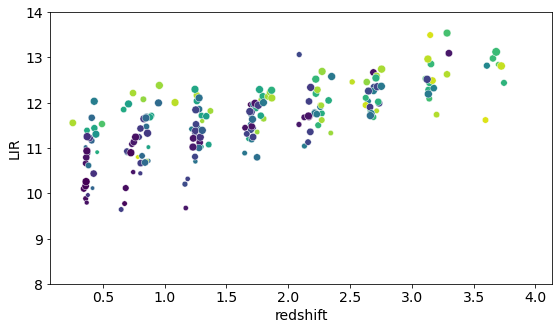

In [832]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(Zs, LIRs, size=Ms, hue=AGNs, legend=False, palette='viridis')
fig.set(ylim=(8,14))
fig.set(ylabel='LIR')
fig.set(xlabel='redshift');

z_mod = np.linspace(0,5,20)
for z in z_mod:
    source_model = [z, 1e12, 0.5, 50] 
    A_mod = model_A_Tdust(cov_Adust.params, source_model)
    T_mod = model_A_Tdust(cov_Tdust.params, source_model)

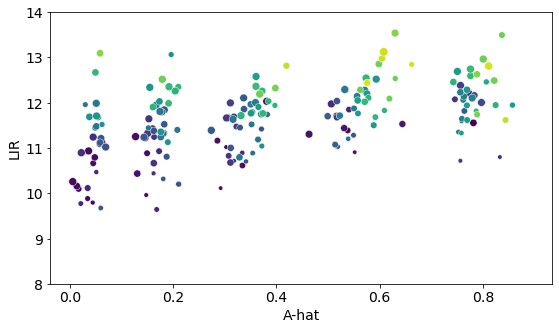

In [834]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(AGNs, LIRs, size=Ms, hue=Zs, legend=False, palette='viridis')
fig.set(ylim=(8,14))
fig.set(xlabel='A-hat');
fig.set(ylabel='LIR');


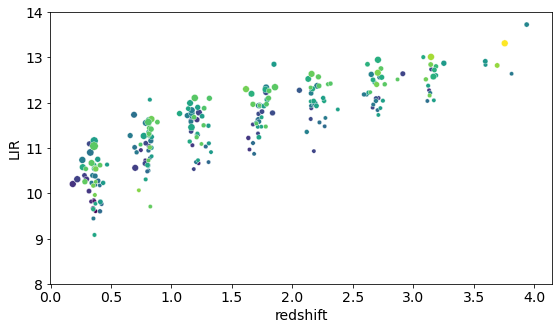

In [809]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(Zs, LIRs, hue=SBs, size=Ms, legend=False, palette='viridis')
fig.set(ylim=(8,14))
fig.set(ylabel='LIR')
fig.set(xlabel='redshift');

z_mod = np.linspace(0,5,20)
for z in z_mod:
    source_model = [z, 1e12, 0.5, 50] 
    A_mod = model_A_Tdust(cov_Adust.params, source_model)
    T_mod = model_A_Tdust(cov_Tdust.params, source_model)

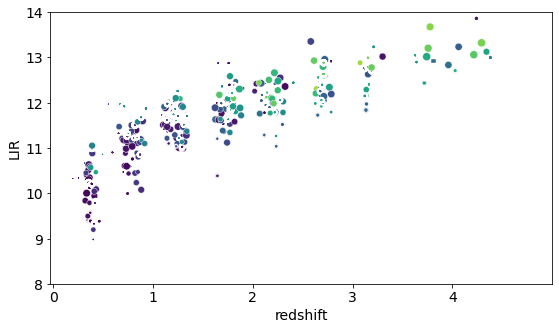

In [668]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(Zs, LIRs, size=Ms, hue=AGNs, style=SBs, legend=False, palette='viridis')
fig.set(ylim=(8,14))
fig.set(ylabel='LIR')
fig.set(xlabel='redshift');

z_mod = np.linspace(0,5,20)
for z in z_mod:
    source_model = [z, 1e12, 0.5, 50] 
    A_mod = model_A_Tdust(cov_Adust.params, source_model)
    T_mod = model_A_Tdust(cov_Tdust.params, source_model)

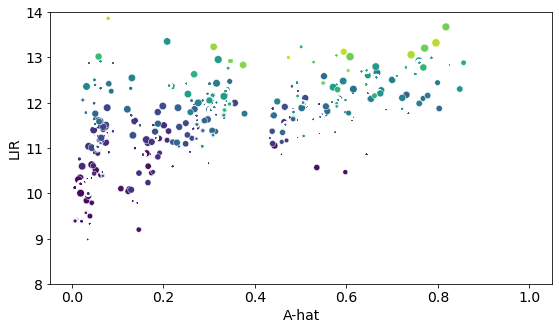

In [688]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(AGNs, LIRs, size=Ms, hue=Zs, style=SBs, legend=False, palette='viridis')
fig.set(ylim=(8,14))
fig.set(xlabel='A-hat');
fig.set(ylabel='LIR')


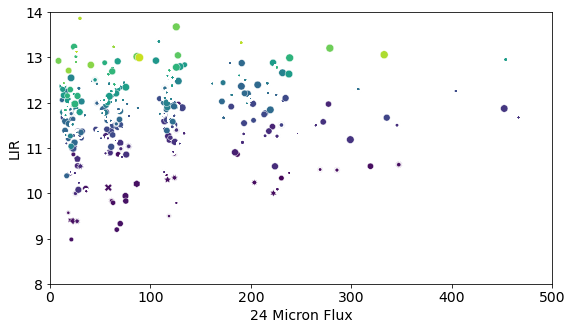

In [692]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(SBs, LIRs, size=Ms, hue=Zs, style=AGNs, legend=False, palette='viridis')
fig.set(ylim=(8,14))
fig.set(xlim=(0,500))
fig.set(xlabel='24 Micron Flux')
fig.set(ylabel='LIR');


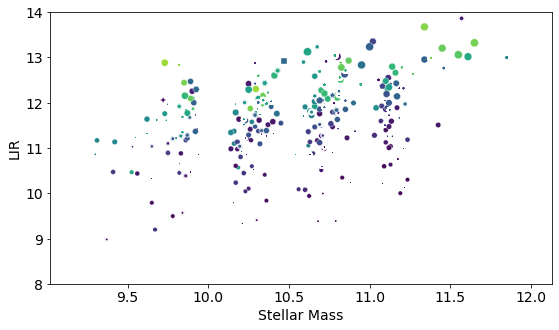

In [667]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(Ms, LIRs, size=Zs, hue=AGNs, style=SBs, legend=False, palette='viridis')
#fig.set(xlim=(1e8,1e12))
fig.set(ylim=(8,14))
fig.set(ylabel='LIR')
fig.set(xlabel='Stellar Mass');

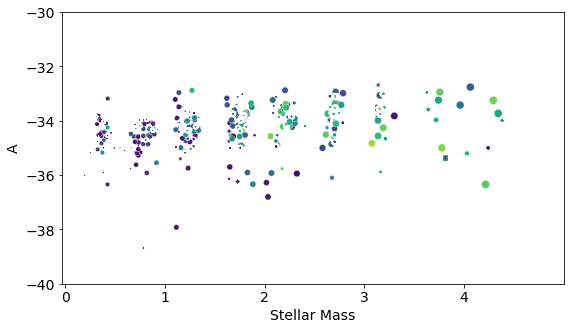

In [686]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(Zs, As, size=Zs, hue=AGNs, style=SBs, legend=False, palette='viridis')
#fig.set(xlim=(1e8,1e12))
fig.set(ylim=(-40,-30))
fig.set(ylabel='A')
fig.set(xlabel='Stellar Mass');

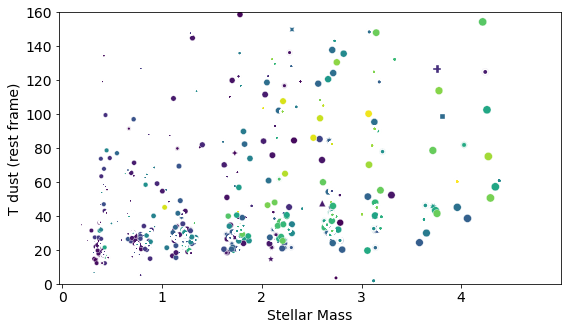

In [685]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.set_color_codes(palette='pastel')
fig = sns.scatterplot(Zs, Ts*(1+Zs), size=Zs, hue=AGNs, style=SBs, legend=False, palette='viridis')
#fig.set(xlim=(1e8,1e12))
fig.set(ylim=(0,160))
fig.set(ylabel='T dust (rest frame)')
fig.set(xlabel='Stellar Mass');

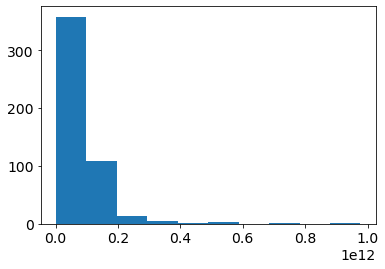

In [656]:
plt.hist(Ms);

In [395]:
cube = np.array([Zs,Ms,AGNs,SBs])

In [525]:
 simstack_catalog_object.catalog_dict['tables']['full_table'].keys()

Index(['ID', 'ra', 'dec', 'mips24', 'z_peak', 'rf_U_V', 'rf_V_J',
       'reddening_AGN', 'a_hat_AGN', 'F_ratio', 'L_UV', 'L_IR', 'SFR_UV',
       'LMASS', 'parent_id', 'parent', 'sfg'],
      dtype='object')

In [563]:
model_cube = simstack_catalog_object.catalog_dict['tables']['full_table'][['z_peak','LMASS','a_hat_AGN','mips24']]
model_cube['LMASS'] = 10**model_cube['LMASS']

In [564]:
model_cube = model_cube.to_numpy().T

In [566]:
np.shape(model_cube)

(4, 166633)

In [567]:
cov_Adust.params

name,value,standard error,relative error,initial value,min,max,vary
slope_z,-0.70251254,0.37730356,(53.71%),1.4,-inf,inf,True
slope_m,-1.8906e-12,3.5723e-12,(188.95%),0.00039847850467367944,-inf,inf,True
slope_agn,-0.82311649,1.35373818,(164.46%),0.0009217950663070404,-inf,inf,True
slope_sb,9.6954e-05,0.00147532,(1521.66%),-0.0007721466896315732,-inf,inf,True
offset,-37.1281895,0.61296634,(1.65%),0.00035689315538663227,-inf,inf,True


In [568]:
model_A = model_A_Tdust(cov_Adust.params, model_cube)
model_Tdust = model_A_Tdust(cov_Tdust.params, model_cube)

In [519]:
def model_A_Tdust(params, X):
    v = params.valuesdict()
    return X[0] * v['slope_z'] + X[1] * v['slope_m'] + X[2] * v['slope_agn'] + X[3] * v['slope_sb'] + v['offset']

In [848]:
def model_A_Tdust(params, X):
    v = params.valuesdict().copy()
    if 'offset' in v:
        model = v.pop('offset')
    else:
        model = 0 
    for i, ival in enumerate(v):
        model+= X[i] * v[ival]
    return model

In [852]:
def slope_A_Tdust(params, X, y):
    model = model_A_Tdust(params, X)
    idx_good = model==model
    return (y[idx_good] - model[idx_good]) #** 2

In [853]:
np.shape(cube)

(4, 864)

In [ ]:
fit_params_Adust = Parameters()
fit_params_Adust.add('slope_z', value=1.4)
fit_params_Adust.add('slope_m', value=1e-3 * np.random.randn())
fit_params_Adust.add('slope_agn', value=1e-3 * np.random.randn())
fit_params_Adust.add('slope_sb', value=1e-3 * np.random.randn())
fit_params_Adust.add('offset', value=1e-3 * np.random.randn())
cov_Adust = minimize(slope_A_Tdust, fit_params_Adust,
                     args=(cube,),
                     kws={'y': As},
                     nan_policy='propagate')

In [854]:
fit_params_Adust = Parameters()
fit_params_Adust.add('slope_z', value=1.4)
fit_params_Adust.add('slope_m', value=1e-3 * np.random.randn())
fit_params_Adust.add('slope_agn', value=1e-3 * np.random.randn())
fit_params_Adust.add('slope_sb', value=1e-3 * np.random.randn())
fit_params_Adust.add('offset', value=1e-3 * np.random.randn())
cov_Adust = minimize(slope_A_Tdust, fit_params_Adust,
                     args=(cube,),
                     kws={'y': As},
                     nan_policy='propagate')

> <ipython-input-848-21e1a9eca716>(8)model_A_Tdust()
      6         model = 0
      7     pdb.set_trace()
----> 8     for i, ival in enumerate(v):
      9         model+= X[i] * v[ival]
     10     return model

ipdb> c
> <ipython-input-852-c25a1974931a>(5)slope_A_Tdust()
      1 def slope_A_Tdust(params, X, y):
      2     model = model_A_Tdust(params, X)
      3     idx_good = model==model
      4     pdb.set_trace()
----> 5     return (y[idx_good] - model[idx_good]) #** 2

ipdb> np.sum(idx_good)
490
ipdb> len(y)
320
ipdb> len(model)
864
ipdb> exit


BdbQuit: 

In [546]:
fit_params_Tdust = Parameters()
fit_params_Tdust.add('slope_z', value=1.4)
fit_params_Tdust.add('slope_m', value=1e-3 * np.random.randn())
fit_params_Tdust.add('slope_agn', value=1e-3 * np.random.randn())
fit_params_Tdust.add('slope_sb', value=1e-3 * np.random.randn())
fit_params_Tdust.add('offset', value=1e-3 * np.random.randn())
cov_Tdust = minimize(slope_A_Tdust, fit_params_Tdust,
                     args=(cube,),
                     kws={'y': Ts,},
                     nan_policy='propagate')

In [547]:
cov_Tdust

In [401]:
cov_Adust

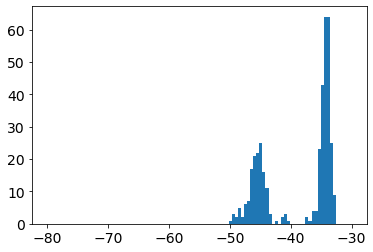

In [286]:
bins = np.linspace(-80,-30,100)
plt.hist(As,bins=bins);

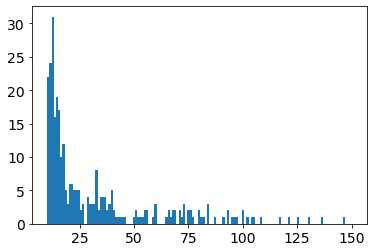

In [260]:
bins = np.linspace(10,150,140)
plt.hist(Ts,bins=bins);

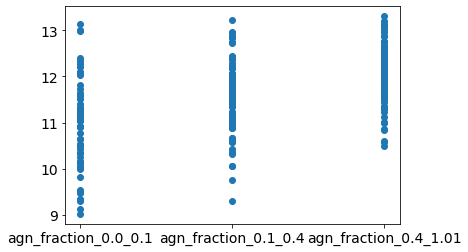

In [172]:
idx_lir = LIRs > 8 
plt.scatter(AGNs[idx_lir],LIRs[idx_lir]);

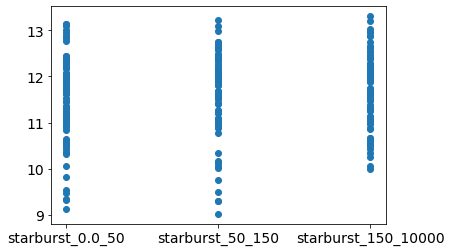

In [173]:
plt.scatter(SBs[idx_lir],LIRs[idx_lir]);

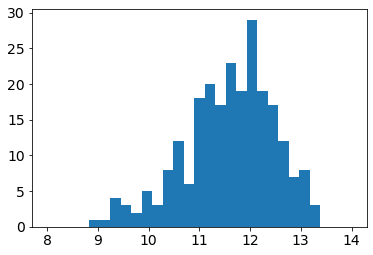

In [152]:
bins=np.linspace(8,14,30)
plt.hist(LIRs,bins=bins);

In [ ]:
def a_and_t_given_params(params_df):
    
    

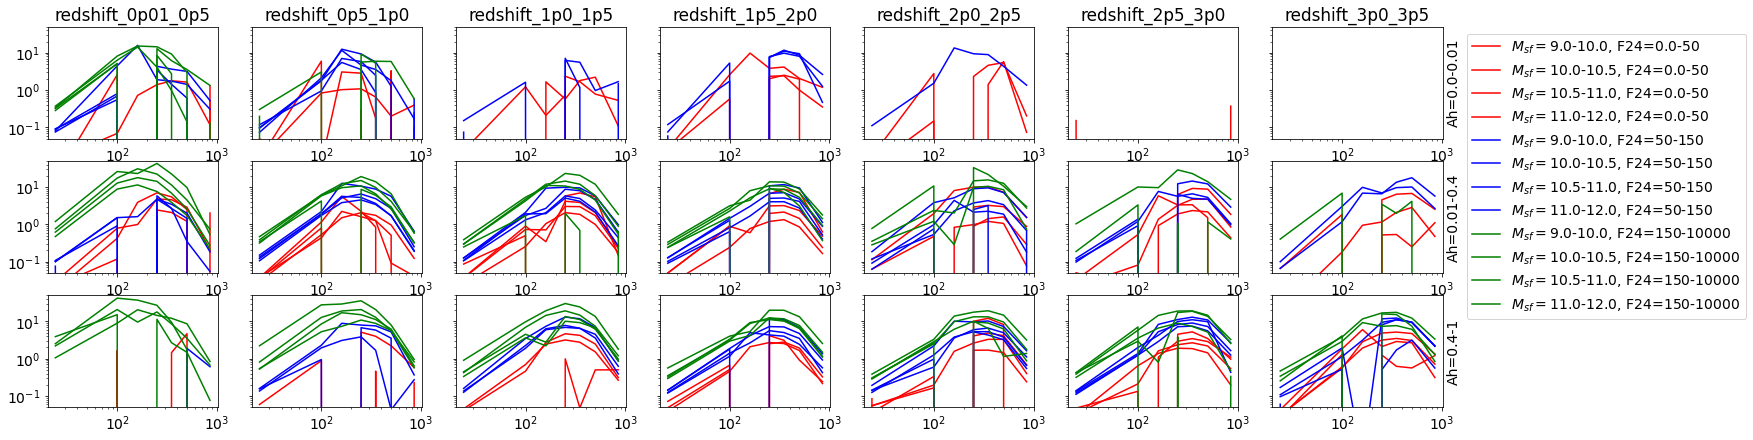

In [85]:
plot_4_pops(simstack_object)

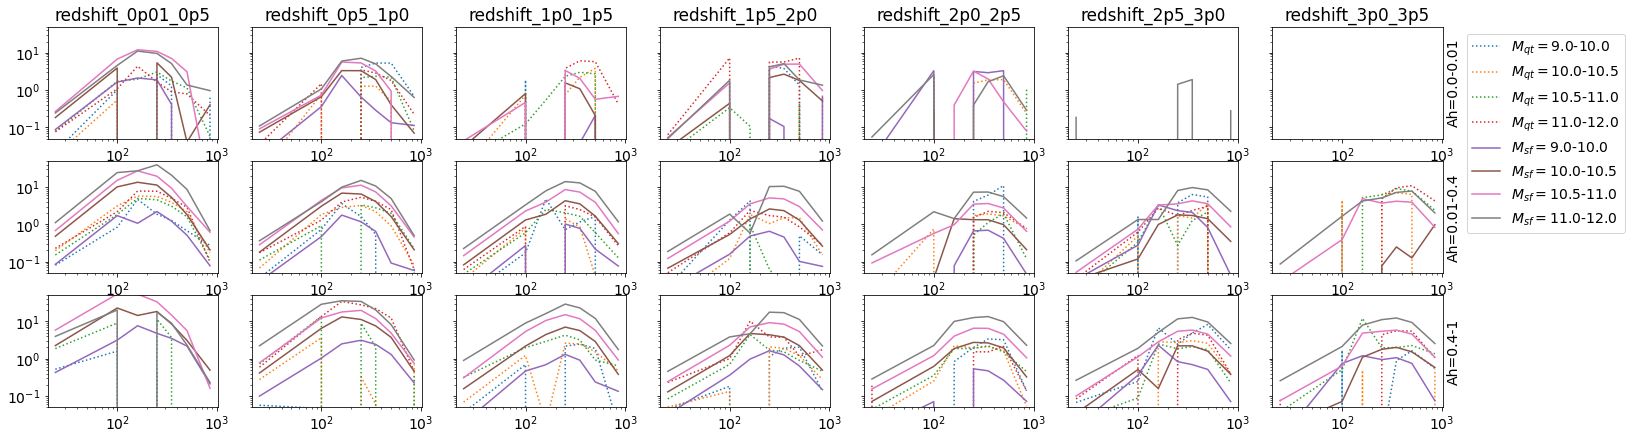

In [34]:
plot_3_pops(simstack_object)

In [29]:
simstack_catalog_object.catalog_dict['tables']['full_table']

,ID,ra,dec,mips24,z_peak,rf_U_V,rf_V_J,reddening_AGN,a_hat_AGN,F_ratio,L_UV,L_IR,SFR_UV,LMASS,parent_id,parent,sfg
0,48069,149.62285,1.692682,-99.900,0.01000,0.216059,-0.045941,0.000000,0.744639,3.754246,7.564770e+05,-3.620730e+06,0.000,4.10,167220,14,1.0
1,235244,149.42641,2.467277,-99.900,0.01000,0.759603,1.265336,0.000000,0.012014,0.001267,9.755410e+04,-3.620730e+06,0.000,4.53,163281,1,1.0
2,48388,149.62099,1.696837,-99.900,0.01000,0.218483,-0.044315,0.000000,0.374862,1.220135,1.705610e+06,-3.620730e+06,0.001,4.59,167220,14,1.0
3,101727,150.38873,2.437387,24.140,0.01000,0.648202,1.092739,0.000000,0.297057,0.751317,2.856980e+05,1.085770e+06,0.000,4.69,154692,10,1.0
4,99560,150.40459,2.407113,-99.900,0.01000,0.835899,1.270945,0.008652,0.166496,0.678889,9.165850e+04,-3.620730e+06,0.000,4.70,36961,15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166628,245050,149.40427,2.573800,28.818,0.38457,2.254378,1.374179,0.000000,0.000000,0.000000,8.416280e+09,4.811700e+09,2.722,11.99,2061,13,0.0
166629,197370,150.71936,2.699727,297.037,3.87075,1.787203,1.703217,0.501187,0.711247,145.901510,4.398120e+10,7.822090e+13,14.224,12.00,2061,13,1.0
166630,203224,150.77554,2.787487,1988.051,2.73762,1.738517,1.899575,1.085214,0.884806,14.021053,9.265100e+10,6.603710e+13,29.963,12.02,197761,20,1.0
166631,256674,149.70549,2.732429,55.925,4.21236,2.043151,1.795774,0.158489,0.178897,2.973451,5.695050e+10,1.644220e+13,18.418,12.12,2061,13,1.0


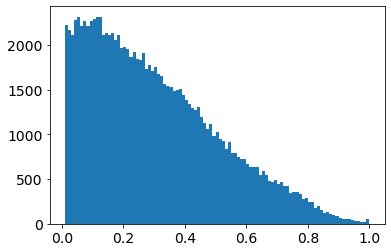

In [47]:
bins = np.linspace(0.01,1,100)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table']['a_hat_AGN'],bins=bins);

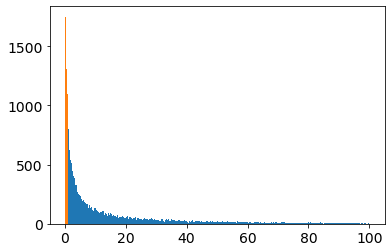

In [53]:
indz = (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] > 1.5) & (simstack_catalog_object.catalog_dict['tables']['full_table']['LMASS'] > 9)

bins = np.linspace(1,100, 500)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['F_ratio'],bins=bins);

bins = np.linspace(0.01,1,5)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['F_ratio'],bins=bins);

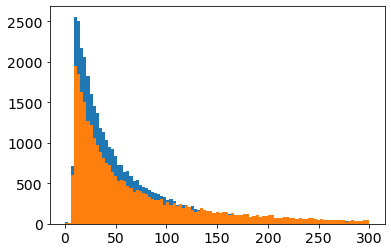

In [51]:
indz = (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] > 1) & (simstack_catalog_object.catalog_dict['tables']['full_table']['LMASS'] > 9)
bins = np.linspace(0,300,100)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['mips24'],bins=bins);

indz = (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] > 0) & (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] < 1) & (simstack_catalog_object.catalog_dict['tables']['full_table']['LMASS'] > 9)
bins = np.linspace(0,300,100)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['mips24'],bins=bins);

In [49]:
indz = (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] > 0.1) & (simstack_catalog_object.catalog_dict['tables']['full_table']['LMASS'] > 9)
np.max(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['mips24'])

25419.504

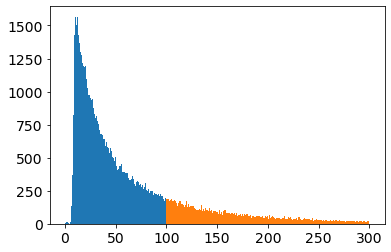

In [50]:
indz = (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] > 0) & (simstack_catalog_object.catalog_dict['tables']['full_table']['LMASS'] > 9)
bins = np.linspace(0,100,100)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['mips24'],bins=bins);

#indz = (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] > 0) & (simstack_catalog_object.catalog_dict['tables']['full_table']['z_peak'] < 1)
bins = np.linspace(100,300,200)
plt.hist(simstack_catalog_object.catalog_dict['tables']['full_table'].loc[indz]['mips24'],bins=bins);

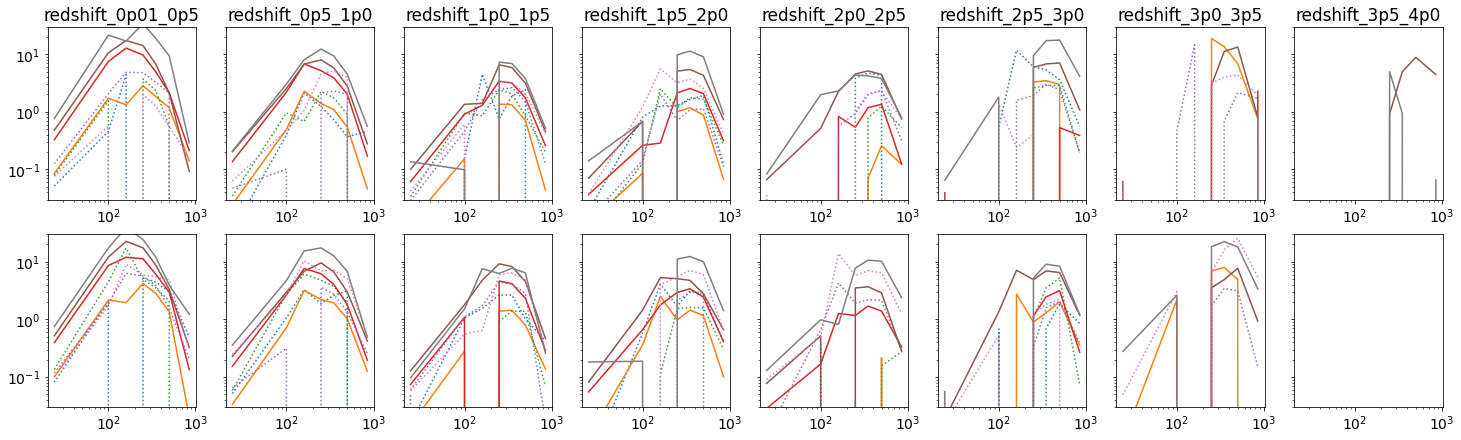

In [218]:
plot_3_pops(simstack_object)

In [18]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

ValueError: Must pass 2-d input. shape=(7, 4, 2)

KeyError: 'raw_fluxes_dict'

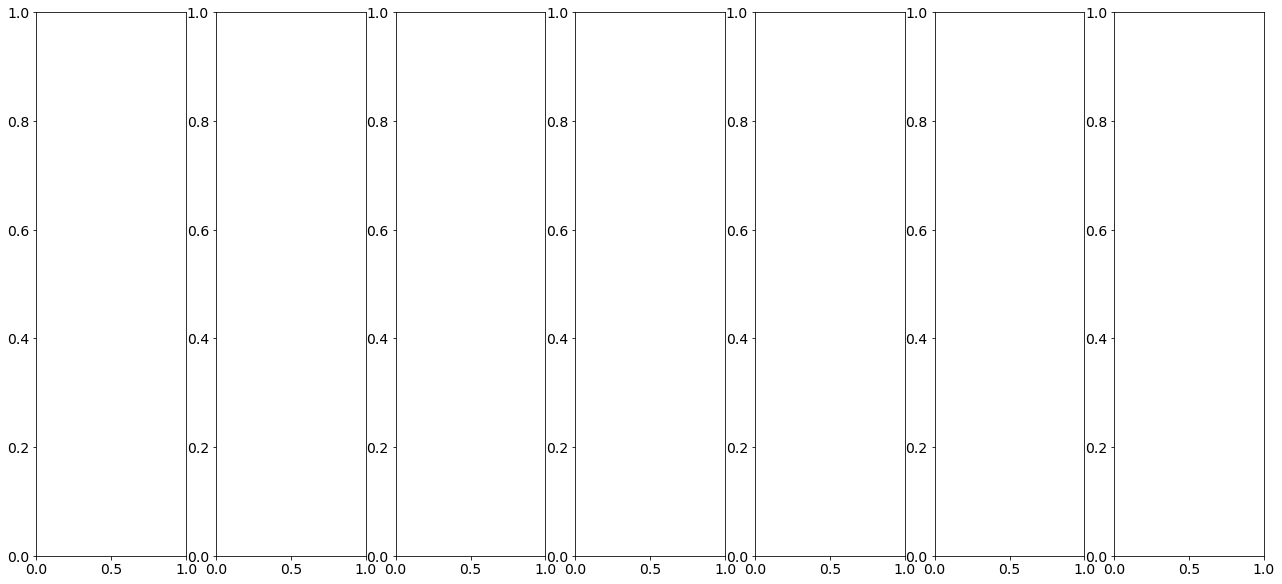

In [9]:
simstack_object.plot_flux_densities()